In [235]:
import yfinance as yf  
import pandas as pd 
import numpy as np
import mplfinance as mpf
import datetime as dt
from math import exp
import re
import matplotlib.pyplot as plt

In [236]:
simbolo = ["BBVA.MC","BKT.MC","TEF.MC","CABK.MC"]
tikers = [yf.Ticker(s) for s in simbolo]
df = [tikers[i].history(period="max").reset_index() for i in range(len(simbolo))]

dateMin = [min(df[i].Date) for i in range(len(simbolo))]
dateMax = [max(df[i].Date) for i in range(len(simbolo))]

for i in range(len(simbolo)):
    df[i] = df[i][(df[i].Date >= dateMin[i]) & (df[i].Date <= dateMax[i])]
    df[i]["symbol"] = [tikers[i].info['symbol']] * len(df[i])

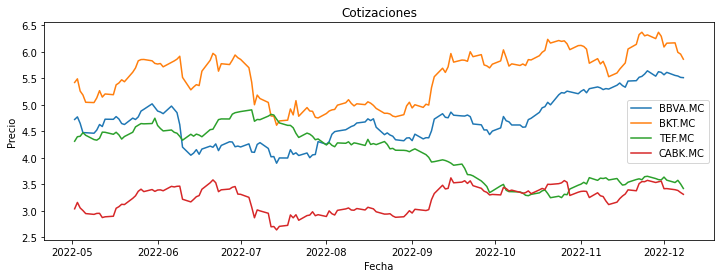

In [237]:
plt.figure(figsize=(12,4))
for i in range(len(simbolo)):
    plt.plot(df[i][df[i].Date > "2022-05-01"]["Date"], df[i][df[i].Date > "2022-05-01"]["Close"], label = min(df[i].symbol) )
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Cotizaciones')
plt.show()

## Matriz varianzas covarianzas

In [238]:
df_init = df[0].groupby('Date').max()
col = "Close"
df_final = df_init.copy()[[col,"symbol"]]
for i in range(1,len(simbolo)):
    df_final = pd.merge(df_final, df[i].groupby('Date').max()[[col,"symbol"]], how ='inner', on='Date')
df_final.reset_index(drop=True, inplace= True)

df_final.columns = [col.strip("_x").strip("_y") + df_final.iloc[0,i+1] if i%2 == 0 else col.strip("_x").strip("_y") + df_final.iloc[0,i] for i in range(len(simbolo)*2) ]
df_final = df_final.iloc[:,[i for i in range(len(simbolo)*2) if i%2 == 0  ]]
m_cov = np.cov(df_final.transpose().to_numpy())

C:\Users\manue\AppData\Local\Temp/ipykernel_4036/272763707.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x', 'symbol_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = pd.merge(df_final, df[i].groupby('Date').max()[[col,"symbol"]], how ='inner', on='Date')


In [239]:
print(df_final.columns.to_list())
m_cov

['CloseBBVA.MC', 'CloseBKT.MC', 'CloseTEF.MC', 'CloseCABK.MC']


array([[ 1.14346349,  0.63187283,  0.84128144,  0.34624524],
       [ 0.63187283,  2.70883153, -0.33986865,  0.76442517],
       [ 0.84128144, -0.33986865,  2.06595809,  0.0652628 ],
       [ 0.34624524,  0.76442517,  0.0652628 ,  0.41522125]])

In [242]:
m_cov_inv = np.linalg.inv(m_cov)
m_cov_inv

array([[ 1.88931663, -0.26878079, -0.78332023, -0.95751945],
       [-0.26878079,  0.87255952,  0.29813969, -1.42911717],
       [-0.78332023,  0.29813969,  0.85300027, -0.02975225],
       [-0.95751945, -1.42911717, -0.02975225,  5.84250297]])